In [1]:
import csv
import praw

In [2]:
reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [3]:
reddit.config.store_json_result = True
subreddit = reddit.subreddit("machinelearning")

## Capture raw submission data to submissions.csv
I scraped the latest 500 posts on different subreddits and saved them into submissions.csv

Vegan (313k), VeganCircleJerk (23k), AskReddit (221m), TodayILearned (20m), TheRedPill (235k), Atheism (2.4m)

In [4]:
# with open('submissions.csv', mode='a') as sub_file:
#     sub_file = csv.writer(sub_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     for submission in reddit.subreddit('atheism').new(limit=500):
#         sub_file.writerow([submission.title, submission.id, submission.subreddit, submission.created_utc, submission.upvote_ratio])

## Upvote Ratio Analysis in different SubReddits

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y_vegan = []
y_vegancj = []
y_askreddit = []
y_til = []
y_trd = []
y_atheism = []

with open('submissions.csv') as sub_file:
    subreader = csv.reader(sub_file)
    for row in subreader:
        if row[2] == "vegan":
            y_vegan.append(float(row[4]))
        elif row[2] == "vegancirclejerk":
            y_vegancj.append(float(row[4]))
        elif row[2] == "AskReddit":
            y_askreddit.append(float(row[4]))
        elif row[2] == "todayilearned":
            y_til.append(float(row[4]))
        elif row[2] == "TheRedPill":
            y_trd.append(float(row[4]))
        elif row[2] == "atheism":
            y_atheism.append(float(row[4]))            

## Sentiment Analysis of Submission Titles

Using VADER

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))
    return str(score['compound'])


# Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In the case above, lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment.

In [7]:
sentiment_analyzer_scores("The phone is super cool.")

'0.7351'

In [26]:
sen_vegan = []
sen_vegancj = []
sen_askreddit = []
sen_til = []
sen_trd = []
sen_atheism = []

with open('submissions.csv') as sub_file:
    subreader = csv.reader(sub_file)
    for row in subreader:
        if row[2] == "vegan":
            sen_vegan.append(float(sentiment_analyzer_scores(row[0])))
        elif row[2] == "vegancirclejerk":
            sen_vegancj.append(float(sentiment_analyzer_scores(row[0])))
        elif row[2] == "AskReddit":
            sen_askreddit.append(float(sentiment_analyzer_scores(row[0])))
        elif row[2] == "todayilearned":
            sen_til.append(float(sentiment_analyzer_scores(row[0])))
        elif row[2] == "TheRedPill":
            sen_trd.append(float(sentiment_analyzer_scores(row[0])))
        elif row[2] == "atheism":
            sen_atheism.append(float(sentiment_analyzer_scores(row[0])))


## Top Level Comment Sentiment Analysis

In [22]:
from praw.models import MoreComments

submission = reddit.submission(id='b6id8b')
# submission.comment_sort = 'new'
comments = submission.comments.list()

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)


Not a failure at all!  We all have made mistakes it comes with the territory.  
It happens. 
You're not a complete failure, everyone has slip-ups. Last weekend I drank tequila rose without even thinking that it would have milk in it! Just learn from the mistake and move on 😊
Don't worry about it! It's not your fault because you didn't purposely get honey mustard. Plus that is such a small thing it's not really a big deal. 
You will live and learn. Trial and error on a lot of these food items 


In [28]:
def sentiment_comments(submission_id, destination_array):
    submission = reddit.submission(id=submission_id)
    comments = submission.comments.list()

    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        destination_array.append(float(sentiment_analyzer_scores(top_level_comment.body)))
        

com_vegan = []
com_vegancj = []
com_askreddit = []
com_til = []
com_trd = []
com_atheism = []

with open('submissionssmall.csv') as sub_file:
    subreader = csv.reader(sub_file)
    for row in subreader:
        if row[2] == "vegan":
            sentiment_comments(row[1], com_vegan)
        elif row[2] == "vegancirclejerk":
            sentiment_comments(row[1], com_vegancj)
        elif row[2] == "AskReddit":
            sentiment_comments(row[1], com_askreddit)
        elif row[2] == "todayilearned":
            sentiment_comments(row[1], com_til)
        elif row[2] == "TheRedPill":
            sentiment_comments(row[1], com_trd)
        elif row[2] == "atheism":
            sentiment_comments(row[1], com_atheism)


## Visualisations

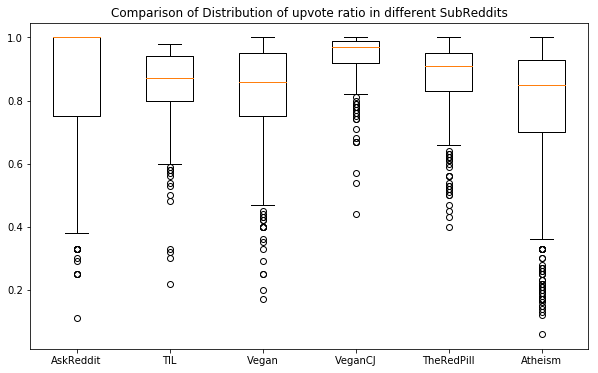

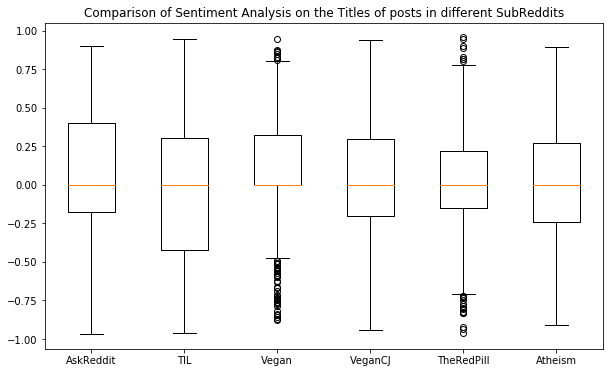

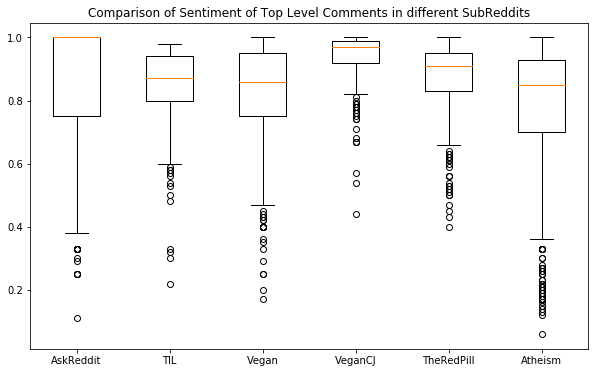

In [27]:
# Post Upvote Ratio      
data = [ y_askreddit, y_til, y_vegan, y_vegancj, y_trd, y_atheism]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Comparison of Distribution of upvote ratio in different SubReddits')

labels = ['AskReddit', 'TIL', 'Vegan', 'VeganCJ', 'TheRedPill', 'Atheism']


ax.boxplot(data, labels=labels)

plt.show()


# Thread Title Sentiment Analysis
data_sentiment = [ sen_askreddit, sen_til, sen_vegan, sen_vegancj, sen_trd, sen_atheism]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Comparison of Sentiment Analysis on the Titles of posts in different SubReddits')

labels_sentiment = ['AskReddit', 'TIL', 'Vegan', 'VeganCJ', 'TheRedPill', 'Atheism']


ax.boxplot(data_sentiment, labels=labels_sentiment)

plt.show()



# Top Level Comments Sentiment Analysis
data_com = [ y_askreddit, y_til, y_vegan, y_vegancj, y_trd, y_atheism]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Comparison of Sentiment of Top Level Comments in different SubReddits')

labels_com = ['AskReddit', 'TIL', 'Vegan', 'VeganCJ', 'TheRedPill', 'Atheism']


ax.boxplot(data_com, labels=labels_com)

plt.show()